Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [ ]:
# %%capture
# import sys

# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
#     !pip install category_encoders==2.*
#     !pip install pandas-profiling==2.*

# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [ ]:
# # Read New York City property sales data
# import pandas as pd
# df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [1]:
from zipfile import ZipFile 
# specifying the zip file name 
file_name = ["../data/amazon_deforestation_2008_2018.zip"]
  
# opening the zip file in READ mode 
for file in file_name:
    with ZipFile(file, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!')

File Name                                             Modified             Size
amazon_deforestation_2008_2018.csv             2020-04-22 23:06:04     60414639
Extracting all the files now...
Done!


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
df_amazon_deforestation = pd.read_csv('amazon_deforestation_2008_2018.csv')

In [3]:
import pandas_profiling
pandas_profiling.__version__

C:\Users\tigju\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.5.0'

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_amazon_deforestation, minimal=True).to_notebook_iframe()
profile

In [266]:
df_amazon_deforestation.drop(columns='Unnamed: 0', inplace=True)
df_amazon_deforestation.head()

,gid,origin_id,uf,pathrow,mainclass,class_name,dsfnv,julday,view_date,ano,areakm,scene_id,publish_ye
0,790933,14.0,RR,157,DESMATAMENTO,d2018,2017.0,203.0,2018-07-22,2018.0,0.016815,101255.0,2018-01-01 00:00:00
1,790938,19.0,PA,22661,DESMATAMENTO,d2018,NaN,227.0,2018-08-15,2018.0,0.182198,101212.0,2018-01-01 00:00:00
2,790968,48.0,PA,22661,DESMATAMENTO,d2018,NaN,227.0,2018-08-15,2018.0,0.004798,101212.0,2018-01-01 00:00:00
3,790983,62.0,PA,22661,DESMATAMENTO,d2018,2017.0,227.0,2018-08-15,2018.0,0.073174,101212.0,2018-01-01 00:00:00
4,790984,63.0,PA,22661,DESMATAMENTO,d2018,2017.0,227.0,2018-08-15,2018.0,0.000375,101212.0,2018-01-01 00:00:00


In [267]:
df_amazon_deforestation.isnull().sum()

gid              0
origin_id        0
uf               0
pathrow          0
mainclass        0
class_name       0
dsfnv         4108
julday           0
view_date        0
ano              0
areakm           0
scene_id         0
publish_ye       0
dtype: int64

In [268]:
df_amazon_deforestation['areakm'].describe()

count    474930.000000
mean          0.155921
std           0.428152
min           0.000000
25%           0.065115
50%           0.089441
75%           0.146672
max          53.771960
Name: areakm, dtype: float64

In [269]:
# column trying to predict
y = df_amazon_deforestation['areakm']
y

0         0.016815
1         0.182198
2         0.004798
3         0.073174
4         0.000375
            ...   
474925    0.166878
474926    0.127529
474927    0.112783
474928    0.319061
474929    0.229661
Name: areakm, Length: 474930, dtype: float64

In [270]:
y.describe()

count    474930.000000
mean          0.155921
std           0.428152
min           0.000000
25%           0.065115
50%           0.089441
75%           0.146672
max          53.771960
Name: areakm, dtype: float64

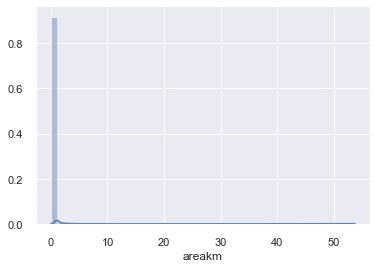

In [271]:
#very right skewed
import seaborn as sns
sns.distplot(y);

In [272]:
# feature engineering

def clean_up(X):
    X = X.copy()
    
 # get the month, year, and day
    X['view_date'] = pd.to_datetime(X['view_date'])
    X['day'] = pd.to_datetime(X['view_date']).dt.day
    X['month'] = pd.to_datetime(X['view_date']).dt.month
    X['year'] = pd.to_datetime(X['view_date']).dt.year
    
    # get rid of zeros
    cols_with_zeros = ['scene_id', 'dsfnv']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    
    # give the column proper name
    X = X.rename(columns={'areakm': 'areakm_squared'}) 
    
    # convert states abbreviations to full names
    X['states'] = X['uf'].replace({'PA': 'Para', 'MT': 'Mato Grosso', 'RO': 'Rondonia', 'AM': 'Amazonas',
                               'MA': 'Maranhao', 'AC': 'Acre', 'RR': 'Roraima',
                              'AP': 'Amapa', 'TO': 'Tocantins'})

    # remove columns
    X = X.drop(columns=['gid', 'origin_id', 'mainclass', 'class_name', 
                        'ano', 'uf'])
    
    return X

In [273]:
cleaned_amazon_deforest = clean_up(df_amazon_deforestation)

In [274]:
cleaned_amazon_deforest.head(3)

,pathrow,dsfnv,julday,view_date,areakm_squared,scene_id,publish_ye,day,month,year,states
0,157,2017.0,203.0,2018-07-22,0.016815,101255.0,2018-01-01 00:00:00,22,7,2018,Roraima
1,22661,NaN,227.0,2018-08-15,0.182198,101212.0,2018-01-01 00:00:00,15,8,2018,Para
2,22661,NaN,227.0,2018-08-15,0.004798,101212.0,2018-01-01 00:00:00,15,8,2018,Para


In [275]:
# define column trying to predict
y = cleaned_amazon_deforest['areakm_squared']

In [276]:
y.describe()

count    474930.000000
mean          0.155921
std           0.428152
min           0.000000
25%           0.065115
50%           0.089441
75%           0.146672
max          53.771960
Name: areakm_squared, dtype: float64

In [277]:
y.mean()

0.15592056315219918

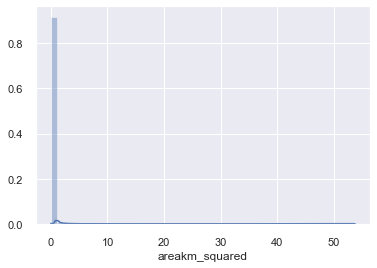

In [278]:
sns.distplot(y);

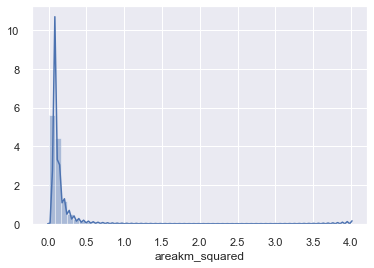

In [279]:
y_log = np.log1p(y)
sns.distplot(y_log);

In [280]:
y_log.mean()

0.12521233627970538

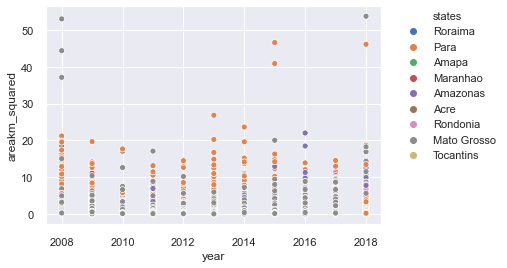

In [281]:
# visualize the data by year
sns.scatterplot(data=cleaned_amazon_deforest, x='year', y='areakm_squared', hue='states');
# put legend outside the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

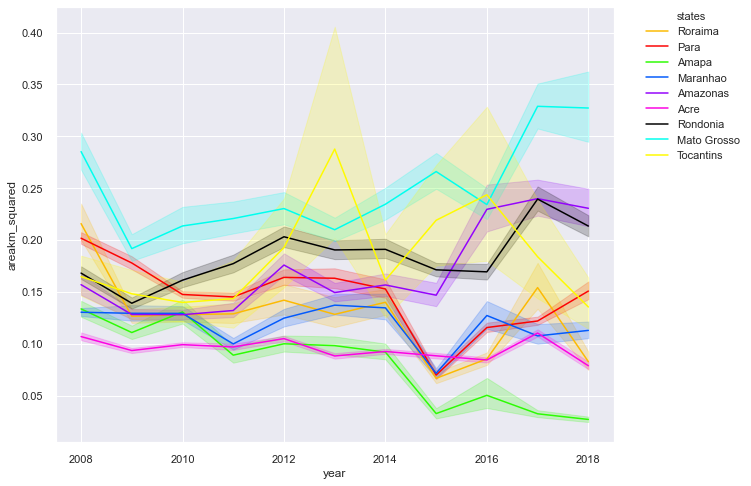

In [282]:
# visualize the data by year
sns.set(style="darkgrid")
colors = ["#fcba03", "#fc0303", "#2dfc03", "#035afc", "#9403fc", "#fc03e3", '#000000', '#00ffee', '#fffb00']
fig, axs = plt.subplots(figsize=(10,8))
with sns.color_palette(colors):
    sns.lineplot(x="year", y="areakm_squared", hue="states", data=cleaned_amazon_deforest);

# put legend outside the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [283]:
cleaned_amazon_deforest['year'].value_counts()

2015    73039
2008    68166
2010    43123
2018    41524
2017    41261
2009    39503
2016    39215
2011    38478
2013    32514
2014    31798
2012    26309
Name: year, dtype: int64

In [284]:
cleaned_amazon_deforest.shape

(474930, 11)

In [285]:
# remove outliers (values that are more than 3 standard deviations from the mean)
from scipy.stats import zscore

z_scores = zscore(cleaned_amazon_deforest['areakm_squared'])
z_scores_abs = np.abs(z_scores)
z_scores_abs
z_scores_filtered = z_scores < 3

z_scores_filtered
new_amazon_deforest = cleaned_amazon_deforest[z_scores_filteres]

new_amazon_deforest.shape

(471054, 11)

In [286]:
new_amazon_deforest.describe()

,pathrow,dsfnv,julday,areakm_squared,scene_id,day,month,year
count,471054.000000,61519.000000,471054.000000,471054.000000,463643.000000,471054.000000,471054.000000,471054.000000
mean,20368.070359,2011.124271,217.421519,0.130306,30551.247984,16.576753,7.628635,2012.863506
std,6846.548957,3.686778,35.878946,0.152896,45104.530100,8.856261,1.216225,3.329218
min,157.000000,1997.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2008.000000
25%,22363.000000,2008.000000,205.000000,0.064969,1064.000000,9.000000,7.000000,2010.000000
50%,22564.000000,2011.000000,217.000000,0.088902,2110.000000,17.000000,8.000000,2013.000000
75%,22869.000000,2014.000000,234.000000,0.144195,100140.000000,25.000000,8.000000,2016.000000
max,23368.000000,2017.000000,363.000000,1.440085,101293.000000,31.000000,12.000000,2018.000000


In [287]:
# target to predict without outliers
new_y = new_amazon_deforest['areakm_squared']

In [288]:
# mean without outliers
new_y.mean()

0.13030570616744339

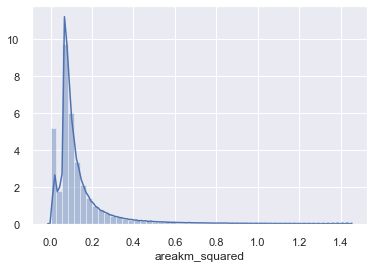

In [289]:
sns.distplot(new_y);

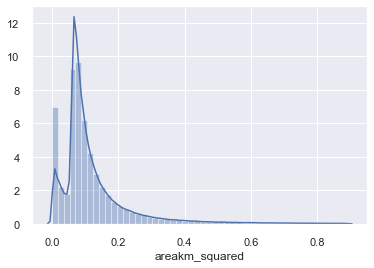

In [290]:
y_log = np.log1p(new_y)
sns.distplot(y_log);

In [291]:
y_log.mean()

0.11531219888170414

In [292]:
# train/val/test time-based split data
train = new_amazon_deforest[new_amazon_deforest['year'] <= 2015]
val = new_amazon_deforest[new_amazon_deforest['year'] == 2016]
test = new_amazon_deforest[new_amazon_deforest['year'] >= 2017]

# train = cleaned_amazon_deforest[cleaned_amazon_deforest['year'] <= 2015]
# val = cleaned_amazon_deforest[cleaned_amazon_deforest['year'] == 2016]
# test = cleaned_amazon_deforest[cleaned_amazon_deforest['year'] >= 2017]

train.shape, val.shape, test.shape

((350401, 11), (38837, 11), (81816, 11))

In [297]:
# define target
target = 'areakm_squared'

# define features
features = train.drop(columns=[target, 'view_date']).columns.tolist()
features

['pathrow',
 'dsfnv',
 'julday',
 'scene_id',
 'publish_ye',
 'day',
 'month',
 'year',
 'states']

In [298]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [299]:
# choose metrics MAE, RMSE, R^2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [300]:
# Random forest

rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
)

rf.fit(X_train, y_train)

print('Random Forest train R^2: ', rf.score(X_train, y_train))
print('Random Forest validation R^2: ', rf.score(X_val, y_val))

Random Forest train R^2:  0.13636708200506753
Random Forest validation R^2:  0.042128215523551955


In [301]:
y_val_pred = rf.predict(X_val)
print(f'Validation MAE: {mean_absolute_error(y_val, y_val_pred):.4f} km squared')

Validation MAE: 0.0818 km squared


In [302]:
# y_train_log = np.log1p(y_train)
# rf.fit(X_train, y_train_log)
# y_val_pred_log = rf.predict(X_val)
# y_val_pred = np.expm1(y_val_pred_log)

y_val_pred = rf.predict(X_val)
print(f'Validation MAE: {mean_absolute_error(y_val, y_val_pred):.4f} km squared')
print(f'Validation RMSE loss: {mean_squared_error(y_val, y_val_pred):.4f}')
print(f'Validation R^2 coefficient: {r2_score(y_val, y_val_pred):.4f}')

Validation MAE: 0.0818 km squared
Validation RMSE loss: 0.0219
Validation R^2 coefficient: 0.0421


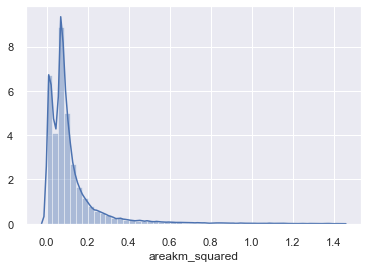

In [303]:
sns.distplot(y_val)

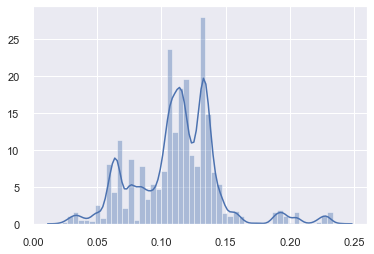

In [315]:
sns.distplot(y_val_pred)

In [ ]:
y_val_pred.shape